In [1]:
import pandas as pd

# Load the CSV file
hotels = pd.read_csv("hotels_modified.csv")

# Show the first few rows
hotels.head()


,hotel_id,city,hotel_name,star_rating,rooms,year_built
0,1,Vienna,Classic Hotel Vienna,3,191,1987
1,3,Linz,Grand Hotel Linz,5,177,1966
2,5,Graz,Grand Hotel Graz,5,49,1934
3,6,Innsbruck,Palace Hotel Innsbruck,3,185,1938
4,7,Vienna,Imperial Hotel Vienna,3,212,1996


In [2]:
# Show column names
print(hotels.columns)

# Check number of rows and columns
print(hotels.shape)

# Get summary of each column
print(hotels.info())

# Describe numeric columns (e.g., ratings or prices if present)
hotels.describe()


Index(['hotel_id', 'city', 'hotel_name', 'star_rating', 'rooms', 'year_built'], dtype='object')
(169, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel_id     169 non-null    int64 
 1   city         169 non-null    object
 2   hotel_name   169 non-null    object
 3   star_rating  169 non-null    int64 
 4   rooms        169 non-null    int64 
 5   year_built   169 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 6.7+ KB
None


,hotel_id,star_rating,rooms,year_built
count,169.000000,169.000000,169.000000,169.000000
mean,103.502959,3.988166,138.029586,1961.792899
std,59.084798,0.794236,59.882467,34.170768
min,1.000000,3.000000,32.000000,1901.000000
25%,53.000000,3.000000,87.000000,1936.000000
50%,105.000000,4.000000,139.000000,1960.000000
75%,153.000000,5.000000,191.000000,1993.000000
max,203.000000,5.000000,230.000000,2019.000000


In [3]:
# Create a small hotel dataset
tiny_hotels = pd.DataFrame({
    "hotel_id": [1, 2, 3],
    "name": ["Hotel A", "Hotel B", "Hotel C"],
    "city": ["Vienna", "Paris", "Berlin"],
    "stars": [4, 3, 5]
})

tiny_hotels


,hotel_id,name,city,stars
0,1,Hotel A,Vienna,4
1,2,Hotel B,Paris,3
2,3,Hotel C,Berlin,5


In [6]:
import pandas as pd

# Step 1: Load datasets
hotels = pd.read_csv("hotels_modified.csv")
reviews = pd.read_csv("reviews_modified.csv")
hotel_amenities = pd.read_csv("hotel_amenities_modified.csv")

# Step 2: Count number of amenities per hotel
# Each row in hotel_amenities is one hotel-amenity pair
amenity_counts = hotel_amenities.groupby("hotel_id").size().reset_index(name="num_amenities")

# Step 3: Average review score per hotel
average_reviews = reviews.groupby("hotel_id")["rating"].mean().reset_index(name="avg_review_score")

# Step 4: Merge everything together
merged = hotels.merge(amenity_counts, on="hotel_id", how="left")
merged = merged.merge(average_reviews, on="hotel_id", how="left")

# Step 5: Preview the result
merged.head()


,hotel_id,city,hotel_name,star_rating,rooms,year_built,num_amenities,avg_review_score
0,1,Vienna,Classic Hotel Vienna,3,191,1987,3.0,3.075000
1,3,Linz,Grand Hotel Linz,5,177,1966,6.0,4.080000
2,5,Graz,Grand Hotel Graz,5,49,1934,6.0,3.925000
3,6,Innsbruck,Palace Hotel Innsbruck,3,185,1938,3.0,3.188889
4,7,Vienna,Imperial Hotel Vienna,3,212,1996,3.0,3.300000


In [5]:
print(reviews.columns)


Index(['review_id', 'hotel_id', 'rating', 'review_date'], dtype='object')


In [8]:
amenity_counts = hotel_amenities.groupby("hotel_id").size().reset_index(name="num_amenities")

In [9]:
hotel_amenities.head(10)

,hotel_id,amenity_id
0,84,7
1,30,8
2,183,7
3,57,4
4,94,2
5,158,8
6,35,6
7,33,10
8,12,8
9,98,8


In [10]:
# Load the amenities lookup table
amenities = pd.read_csv("amenities.csv")

# Merge to get the names
hotel_amenities_named = hotel_amenities.merge(amenities, on="amenity_id", how="left")

# Preview
hotel_amenities_named.head()


,hotel_id,amenity_id,amenity_name
0,84,7,Free WiFi
1,30,8,Conference Rooms
2,183,7,Free WiFi
3,57,4,Restaurant
4,94,2,Spa


import pandas as pd

# Load datasets
hotels = pd.read_csv("hotels_modified.csv")
reviews = pd.read_csv("reviews_modified.csv")
hotel_amenities = pd.read_csv("hotel_amenities_modified.csv")

# Optional: clean column names just in case
hotels.columns = hotels.columns.str.strip()
reviews.columns = reviews.columns.str.strip()
hotel_amenities.columns = hotel_amenities.columns.str.strip()


amenity_counts = hotel_amenities.groupby("hotel_id").size().reset_index(name="num_amenities")

In [13]:
print(reviews.columns)

Index(['review_id', 'hotel_id', 'rating', 'review_date'], dtype='object')


In [14]:
average_reviews = reviews.groupby("hotel_id")["rating"].mean().reset_index(name="avg_rating")


In [16]:
# Merge all info together
merged = hotels.merge(amenity_counts, on="hotel_id", how="left")
merged = merged.merge(average_reviews, on="hotel_id", how="left")

# Drop rows with no review score or amenity info
merged = merged.dropna(subset=["num_amenities", "avg_rating"])

# Preview
merged.head(10)  # show more rows this time!


,hotel_id,city,hotel_name,star_rating,rooms,year_built,num_amenities,avg_rating
0,1,Vienna,Classic Hotel Vienna,3,191,1987,3.0,3.075000
1,3,Linz,Grand Hotel Linz,5,177,1966,6.0,4.080000
2,5,Graz,Grand Hotel Graz,5,49,1934,6.0,3.925000
3,6,Innsbruck,Palace Hotel Innsbruck,3,185,1938,3.0,3.188889
4,7,Vienna,Imperial Hotel Vienna,3,212,1996,3.0,3.300000
5,8,Innsbruck,Premium Suites Innsbruck,5,139,1959,6.0,3.927273
6,9,Vienna,Park Hotel Vienna,3,126,2019,3.0,2.783333
7,10,Vienna,Resort & Spa Vienna,4,213,1936,5.0,3.650000
8,14,Linz,Family Hotel Linz,3,127,1990,2.0,2.925000
9,15,Innsbruck,Resort & Spa Innsbruck,5,91,1907,6.0,4.150000


In [17]:
# Create groups based on number of amenities
merged["amenity_group"] = pd.cut(
    merged["num_amenities"],
    bins=[0, 3, 6, 10, 20],
    labels=["0-3", "4-6", "7-10", "11-20"]
)

# Group by amenity group
grouped = merged.groupby("amenity_group")["avg_rating"].mean().reset_index()
print(grouped)


<ipython-input-17-f5c9d02f44df>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged.groupby("amenity_group")["avg_rating"].mean().reset_index()


  amenity_group  avg_rating
0           0-3    3.204890
1           4-6    3.539485
2          7-10    3.923505
3         11-20         NaN


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="amenity_group", y="avg_rating", data=grouped)
plt.title("Average Review Rating by Number of Amenities")
plt.xlabel("Number of Amenities")
plt.ylabel("Avg Review Rating")
plt.show()

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [19]:
!pip install seaborn

<class 'OSError'>: Not available

Matplotlib is building the font cache; this may take a moment.


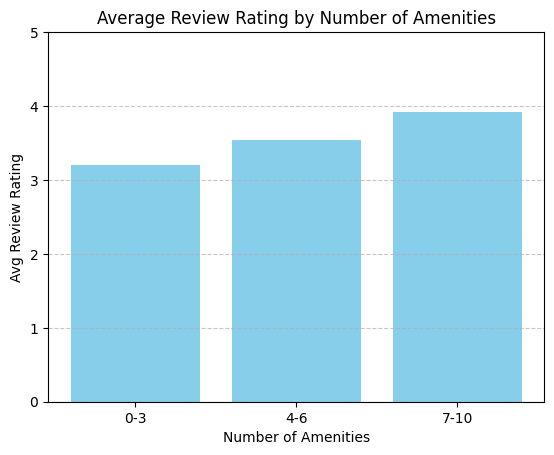

In [20]:
import matplotlib.pyplot as plt

# Create the bar plot manually
x = grouped["amenity_group"].astype(str)
y = grouped["avg_rating"]

plt.bar(x, y, color="skyblue")
plt.title("Average Review Rating by Number of Amenities")
plt.xlabel("Number of Amenities")
plt.ylabel("Avg Review Rating")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<class 'KeyError'>: 'avg_review_score'

In [26]:
import statsmodels.api as sm

# Drop any missing values (very important)
reg_data = merged.dropna(subset=["num_amenities", "avg_rating"])

# Define independent (X) and dependent (y) variables
X = reg_data["num_amenities"]
y = reg_data["avg_rating"]

# Add constant (intercept) to X
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     97.34
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           9.91e-18
Time:                        20:10:03   Log-Likelihood:                -43.731
No. Observations:                 141   AIC:                             91.46
Df Residuals:                     139   BIC:                             97.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7812      0.080     34.605